# Based on the materials in :

[sqlite3 — DB-API 2.0 interface for SQLite databases](https://docs.python.org/3/library/sqlite3.html)

[PythonStarter](https://github.com/Olamiotan/PythonStarter)

[Sample Database](https://www.sqlitetutorial.net/sqlite-sample-database/)

[Read from Database with SQLite](https://pythonprogramming.net/sqlite-part-3-reading-database-python/)

![chinook database tables and their relationships](https://cdn.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg)

In [0]:
import sqlite3
conn = sqlite3.connect('/content/chinook.db') 

In [0]:
import pandas as pd

In [0]:
cur = conn.cursor()
cur.execute(""" 
            SELECT ar.Name AS ArtistName, COUNT(t.TrackId) AS TrackCount FROM tracks t
            INNER JOIN albums al ON t.AlbumId = al.AlbumId
            INNER JOIN artists ar ON al.ArtistId = ar.ArtistId
            INNER JOIN genres g ON t.GenreId = g.GenreId
            WHERE g.GenreId = 1 
            GROUP BY al.ArtistId 
            ORDER BY TrackCount DESC LIMIT 10
            """)
TopTenBands = cur.fetchall()
colnames = [desc[0] for desc in cur.description] 
conn.commit()


#create the pandas dataframe
TopTenBands = pd.DataFrame(TopTenBands)
TopTenBands.columns = colnames

#close the connection
cur.close()

In [57]:
import numpy as np
np.shape(TopTenBands)

(10, 2)

In [58]:
TopTenBands

,ArtistName,TrackCount
0,Led Zeppelin,114
1,U2,112
2,Deep Purple,92
3,Iron Maiden,81
4,Pearl Jam,54
5,Van Halen,52
6,Queen,45
7,The Rolling Stones,41
8,Creedence Clearwater Revival,40
9,Kiss,35


In [0]:
A = TopTenBands.TrackCount
np.shape(A)
import matplotlib.pyplot as plt

# Visualizations

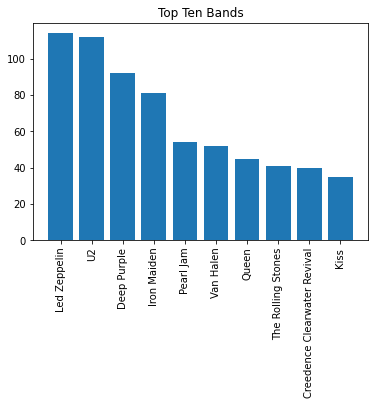

In [63]:
#plt.plot(TopTenBands.TrackCount)
fig, ax = plt.subplots()
plt.bar(TopTenBands.ArtistName,TopTenBands.TrackCount)
plt.xticks(rotation=90)
plt.title('Top Ten Bands')
plt.show()

In [0]:
cur = conn.cursor()
cur.execute(""" 
            SELECT BillingCountry, round(sum(Total),2) as Revenue
            FROM invoices
            group by BillingCountry
            order by Revenue Desc;
            """)
TopRevenue = cur.fetchall()
colnames = [desc[0] for desc in cur.description] 
conn.commit()


#create the pandas dataframe
TopRevenue = pd.DataFrame(TopRevenue)
TopRevenue.columns = colnames

#close the connection
cur.close()

In [67]:
TopRevenue

,BillingCountry,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


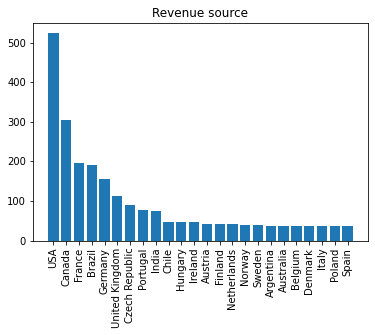

In [68]:
#plt.plot(TopTenBands.TrackCount)
fig, ax = plt.subplots()
plt.bar(TopRevenue.BillingCountry,TopRevenue.Revenue)
plt.xticks(rotation=90)
plt.title('Revenue source')
plt.show()